In [1]:
import requests
from bs4 import BeautifulSoup as bs

#### App Review

In [4]:
import re
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
Apps = {'CC':553834731, 'Tinder':547702041, 'FB':284882215, 'Twitter':333903271 }
COUNTRY_CODE = ['us','ca','au','gb','in','ie','za']

dataf = {'app':[],'rating':[],'version':[],'title':[]}


for i in Apps:
    for j in COUNTRY_CODE:
        r = requests.get(f'https://itunes.apple.com/{j}/rss/customerreviews/id={Apps[i]}/page={1}/sortby=mostrecent/json').text

        soup = bs(r, "html.parser")
        data = json.loads(soup.text)
        entry = data['feed']['entry']
        for rev in range(len(entry)):
            rate = entry[rev]['im:rating']['label']
            ver = entry[rev]['im:version']['label']
            title = entry[rev]['title']['label']
            dataf['rating'].append(int(rate))
            dataf['version'].append(ver)
            dataf['app'].append(i)
            dataf['title'].append(title)
        df = pd.DataFrame(data=dataf)
CandyCrush = df.loc[df['app']=='CC']
Tinder = df.loc[df['app']=='Tinder']
FB = df.loc[df['app']=='FB']
Twitter = df.loc[df['app']=='Twitter']

In 5 star review the word Candy crush appears 11 times
in the 1 star reviews the word Candy crush appears 2 times


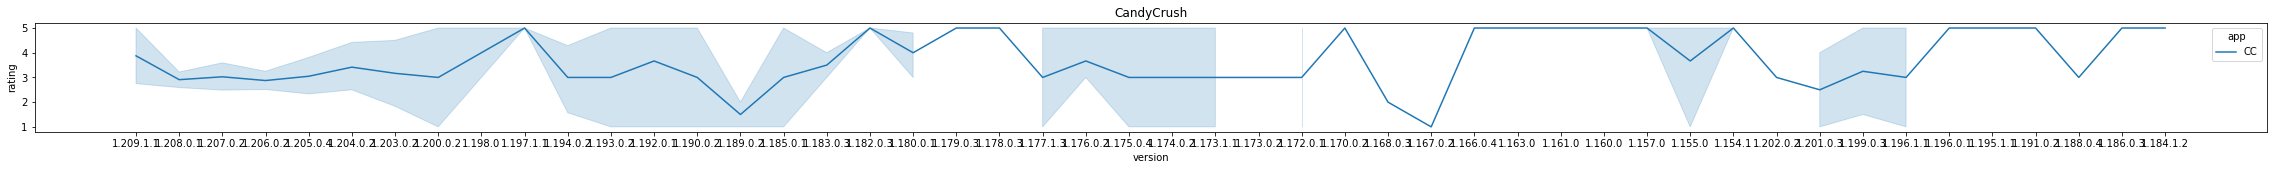

In [5]:
CC5 = CandyCrush.loc[CandyCrush['rating'] == 5]
ccnum5 = CC5.title.str.get_dummies().sum().max()
ccword5 = CC5.title.str.get_dummies().sum().idxmax()
CC1 = CandyCrush.loc[CandyCrush['rating'] == 1]
ccnum1 = CC1.title.str.get_dummies().sum().max()
ccword1 = CC1.title.str.get_dummies().sum().idxmax()
print(f'In 5 star review the word {ccword5} appears {ccnum5} times')
print(f'in the 1 star reviews the word {ccword1} appears {ccnum1} times')
fig, ax = plt.subplots(figsize=(40,2))
sns.lineplot(data=CandyCrush, x='version', y = 'rating',hue='app').set(title='CandyCrush')
plt.show()

In 5 star reviews the word Brilliant App appears 2 times
In the 1 star reviews the word Brilliant App appears 2 times


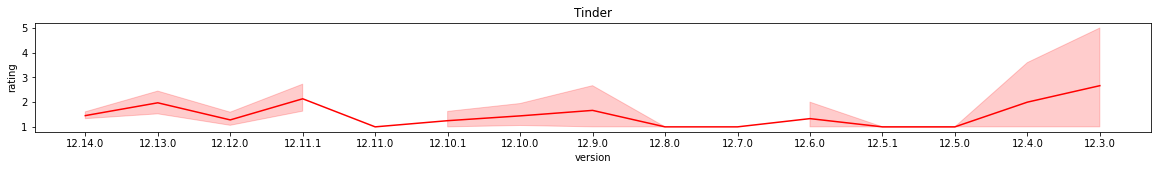

In [6]:
td5 = Tinder.loc[Tinder['rating'] == 5]
tdnum5 = td5.title.str.get_dummies().sum().max()
tdword5 = td5.title.str.get_dummies().sum().idxmax()
td1 = Tinder.loc[Tinder['rating'] == 1]
tdnum1 = td5.title.str.get_dummies().sum().max()
tdword1 = td5.title.str.get_dummies().sum().idxmax()
print(f'In 5 star reviews the word {tdword5} appears {tdnum5} times' )
print(f'In the 1 star reviews the word {tdword1} appears {tdnum1} times')
fig, ax = plt.subplots(figsize=(20,2))
sns.lineplot(data=Tinder, x='version', y = 'rating',color='r').set(title='Tinder')
plt.show()

In 5 star reviews the word 322.0 App crashing appears 1 times
In the 1 star reviews the word Censorship appears 9 times


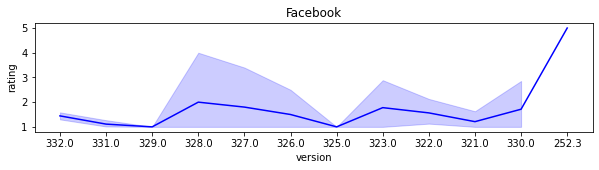

In [7]:
fb5 = FB.loc[FB['rating'] == 5]
fbnum5 = fb5.title.str.get_dummies().sum().max()
fbword5 = fb5.title.str.get_dummies().sum().idxmax()
fb1 = FB.loc[FB['rating'] == 1]
fbnum1 = fb1.title.str.get_dummies().sum().max()
fbword1 = fb1.title.str.get_dummies().sum().idxmax()
print(f'In 5 star reviews the word {fbword5} appears {fbnum5} times' )
print(f'In the 1 star reviews the word {fbword1} appears {fbnum1} times')
fig, ax = plt.subplots(figsize=(10,2))
sns.lineplot(data=FB, x='version', y = 'rating',color='b').set(title='Facebook')
plt.show()

In 5 star reviews the word Twitter appears 3 times
In the 1 star reviews the word Censorship appears 3 times


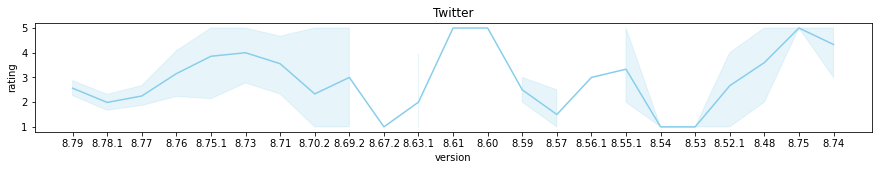

In [8]:
tw5 = Twitter.loc[Twitter['rating'] == 5]
twnum5 = tw5.title.str.get_dummies().sum().max()
twword5 = tw5.title.str.get_dummies().sum().idxmax()
tw1 = Twitter.loc[Twitter['rating'] == 1]
twnum1 = tw1.title.str.get_dummies().sum().max()
twword1 = tw1.title.str.get_dummies().sum().idxmax()
print(f'In 5 star reviews the word {twword5} appears {twnum5} times' )
print(f'In the 1 star reviews the word {twword1} appears {twnum1} times')
fig, ax = plt.subplots(figsize=(15,2))
sns.lineplot(data=Twitter, x='version', y = 'rating',color='skyblue').set(title='Twitter')
plt.show()